<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Model evaluation

This example shows how to load model and observation data and evalute model performance. 

In [15]:
# # skip this if package has already been installed
# !pip install modvis

In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os

from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp
import pandas as pd

import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s: %(message)s')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# run_steadystate = "1-spinup_steadystate"
work_dir = f"../../model2/"

rho_m = 55500 # moles/m^3, water molar density. Check this in the xml input file.

In [18]:
# model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [19]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc.

In [20]:
run_dir = "3-transient"
model_dir = os.path.join(work_dir, run_dir)
logging.info(f"Loading data from {model_dir}")

2025-04-19 18:29:39,286 - root - INFO: Loading data from ../../model2/3-transient


In [21]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance_computational_domain.csv",
                             domain_names = None,
                                canopy = True, plot = False
                               )

In [73]:
work_dir2 = f"../../../ats-project-v5/model2/"
run_dir2 = "3-transient"
model_dir2 = os.path.join(work_dir2, run_dir2)
simu_df2 = ATSutils.load_waterBalance(model_dir2, WB_filename="water_balance_computational_domain.csv",
                             domain_names = None,
                                canopy = True, plot = False
                               )

In [74]:
nhm_df = pd.read_csv("../../seg_outflow_segment_1654.csv", index_col='time')
nhm_df['seg_outflow_m3'] = nhm_df['seg_outflow'] * 2446.58
nhm_df

,segment,seg_outflow,seg_outflow_m3
time,,,
1980-10-01,1654,12.597700,30821.281157
1980-10-02,1654,21.509501,52624.713742
1980-10-03,1654,34.966999,85549.560545
1980-10-04,1654,65.791199,160963.430990
1980-10-05,1654,44.082100,107850.384009
...,...,...,...
2016-12-27,1654,75.861000,185600.005529
2016-12-28,1654,72.785202,178074.819574
2016-12-29,1654,69.502502,170043.432423


<AxesSubplot:xlabel='time'>

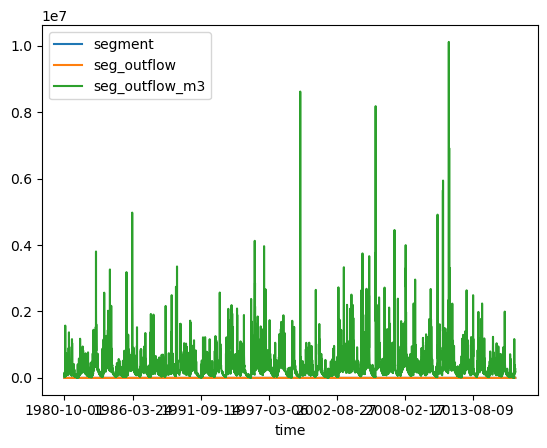

In [75]:
nhm_df.plot()

## Load observation data

Provide USGS gage number (i.e., `sites`) to download the streamflow. 

In [76]:
#obs_df = utils.load_nwis(sites= "01440000", start = '2013-10-01', end = '2015-10-1')
obs_df

,Discharge [m^3/d]
datetime,
2013-10-01,47218.994
2013-10-02,44772.414
2013-10-03,43304.466
2013-10-04,43304.466
2013-10-05,43304.466
...,...
2015-09-27,42570.492
2015-09-28,56515.998
2015-09-29,54803.392


<AxesSubplot:xlabel='datetime'>

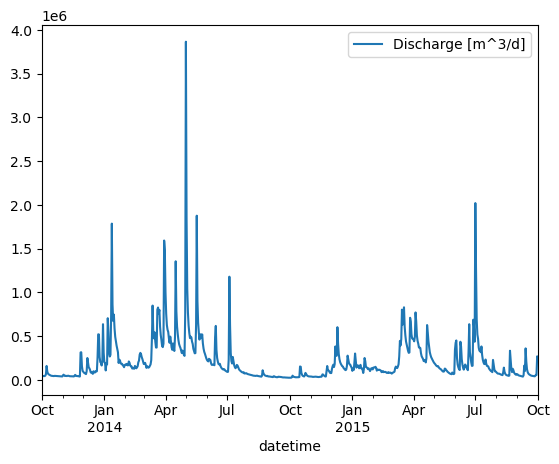

In [77]:
obs_df.plot()

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow.

In [78]:
nhm_df.index = pd.to_datetime(nhm_df.index.astype(str))

In [79]:
nhm_df

,segment,seg_outflow,seg_outflow_m3
time,,,
1980-10-01,1654,12.597700,30821.281157
1980-10-02,1654,21.509501,52624.713742
1980-10-03,1654,34.966999,85549.560545
1980-10-04,1654,65.791199,160963.430990
1980-10-05,1654,44.082100,107850.384009
...,...,...,...
2016-12-27,1654,75.861000,185600.005529
2016-12-28,1654,72.785202,178074.819574
2016-12-29,1654,69.502502,170043.432423


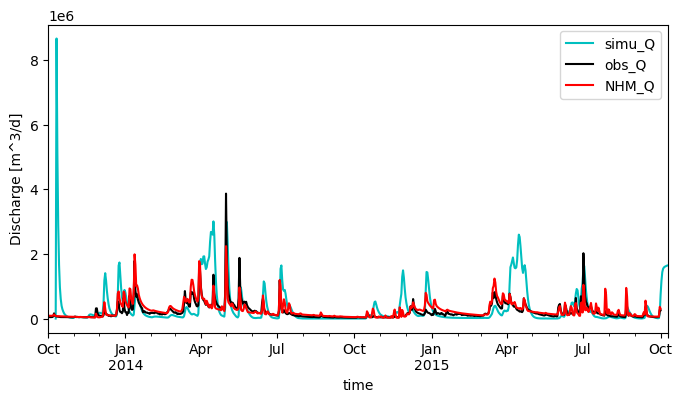

In [80]:
fig,ax = plt.subplots(1,1, figsize=(8,4))
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")
obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
filtered_nhm_df = nhm_df.loc["2013-10-01":"2015-10-1"]
filtered_nhm_df['seg_outflow_m3'].plot(color='r', ax=ax, label="NHM_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()

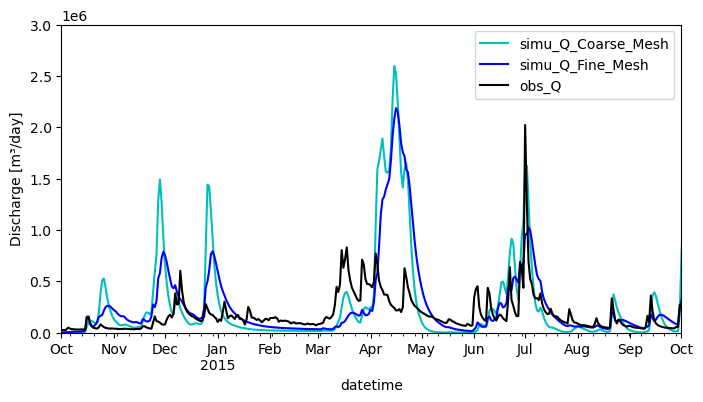

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot full data
simu_df['watershed boundary discharge [m^3/d]'].plot(color='c', ax=ax, label="simu_Q_Coarse_Mesh")
simu_df2['watershed boundary discharge [m^3/d]'].plot(color='b', ax=ax, label="simu_Q_Fine_Mesh")
obs_df['Discharge [m^3/d]'].plot(color='k', ax=ax, label="obs_Q")

# Ensure m³/day is computed
nhm_df['seg_outflow_m3'] = nhm_df['seg_outflow'] * 2446.58
#nhm_df['seg_outflow_m3'].plot(color='r', ax=ax, label="NHM_Q")

# Set axis limits
ax.set_xlim(pd.to_datetime("2014-10-01"), pd.to_datetime("2015-10-01"))
ax.set_ylabel("Discharge [m³/day]")
ax.set_ylim(0, 3e6)
ax.legend()


## Flow Duration Curve (FDC) comparison

The flow duration curve is a plot that shows the percentage of time that flow in a stream is likely to equal or exceed some specified value of interest (also called "exceedance probability). For example, it can be used to show the percentage of time river flow can be expected to exceed a design flow of some specified value (e.g., 20 cfs), or to show the discharge of the stream that occurs or is exceeded some percent of the time (e.g., 80% of the time). See [reference](https://streamflow.engr.oregonstate.edu/analysis/flow/index.htm) on how it's calculated.

In model validation, comparing observed and simulated FDCs shows how well a hydrological model reproduces the full range of flows (low, median, and high).

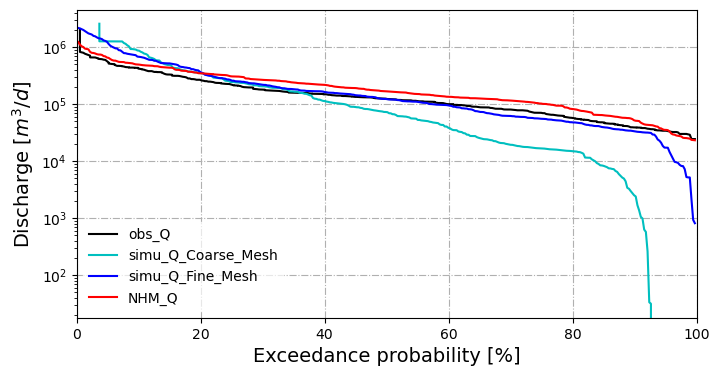

In [83]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],simu_df2['watershed boundary discharge [m^3/d]'], nhm_df['seg_outflow_m3']],
           labels=['obs_Q',"simu_Q_Coarse_Mesh","simu_Q_Fine_Mesh",'NHM_Q'], 
           colors=['k', 'c','b','r'],
           start_date="2014-10-01" 
           )

## One-to-one plot

One to one scatter plot with metrics.

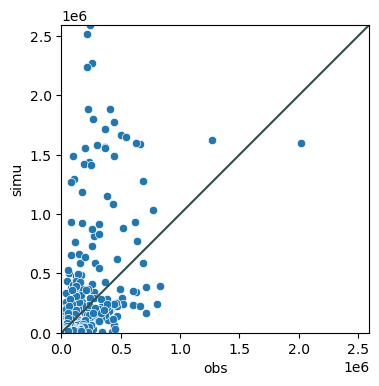

In [17]:
metrics = gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               # metrics=['R^2', 'NSE', 'mKGE'],
                metrics='all',
                show_metrics=False,
               show_density=False,
                start_date="2014-10-01"
               )

In [18]:
metrics

{'pearsonr': 0.45722831066343633,
 'R^2': 0.20905772807213985,
 'RMSE': 422567.5657074744,
 'rRMSE': 2.311432080079963,
 'NSE': -3.81988393327571,
 'logNSE': -3.220296533836038,
 'bias': -82607.6523922194,
 'pbias': 45.18614141144265,
 'KGE': -0.5841683115087657,
 'npKGE': 0.37241464093081644,
 'mKGE': 0.029624416506483064}

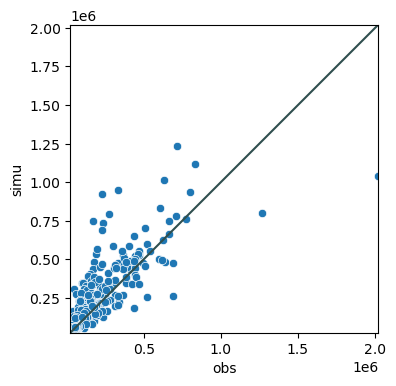

In [56]:
metrics = gp.one2one_plot(obs_df['Discharge [m^3/d]'], nhm_df['seg_outflow_m3'],
               # metrics=['R^2', 'NSE', 'mKGE'],
                metrics='all',
                show_metrics=False,
               show_density=False,
                start_date="2014-10-01"
               )

In [57]:
metrics

{'pearsonr': 0.7920200085894618,
 'R^2': 0.6272956940060511,
 'RMSE': 137920.4005372527,
 'rRMSE': 0.7544205096894988,
 'NSE': 0.4865463086598276,
 'logNSE': 0.618882986340844,
 'bias': -52587.376467428534,
 'pbias': 28.765139314597043,
 'KGE': 0.6416533514198777,
 'npKGE': 0.6837733346512984,
 'mKGE': 0.5996086515155374}